In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

sample_size = 10000

In [2]:
#генерируем выборку из стандартного нормального распределения
sample = sps.norm.rvs(size = sample_size, loc = 0, scale = 1)

### Считаем $F^*_{n}(x)$

In [3]:
#эмпирическая функция распределения возвращает массив точек - скачки функции распределения
#sort_sample = sorted(sample)
def emp_distr_func(n):
    func = []
    x_value = np.linspace(-4, 4, sample_size)
    sort_sample = sorted(sample[: n + 1])
   
    for i in range(sample_size):
        counter = 0
        while (x_value[i] >= sort_sample[counter] and counter < n): 
            counter += 1
            
        func.append(counter / n)
    return func


### Для $n\in\{10, 25, 50, 100, 1000, 10 000\}$ построим график эмпирической  функции распределения 

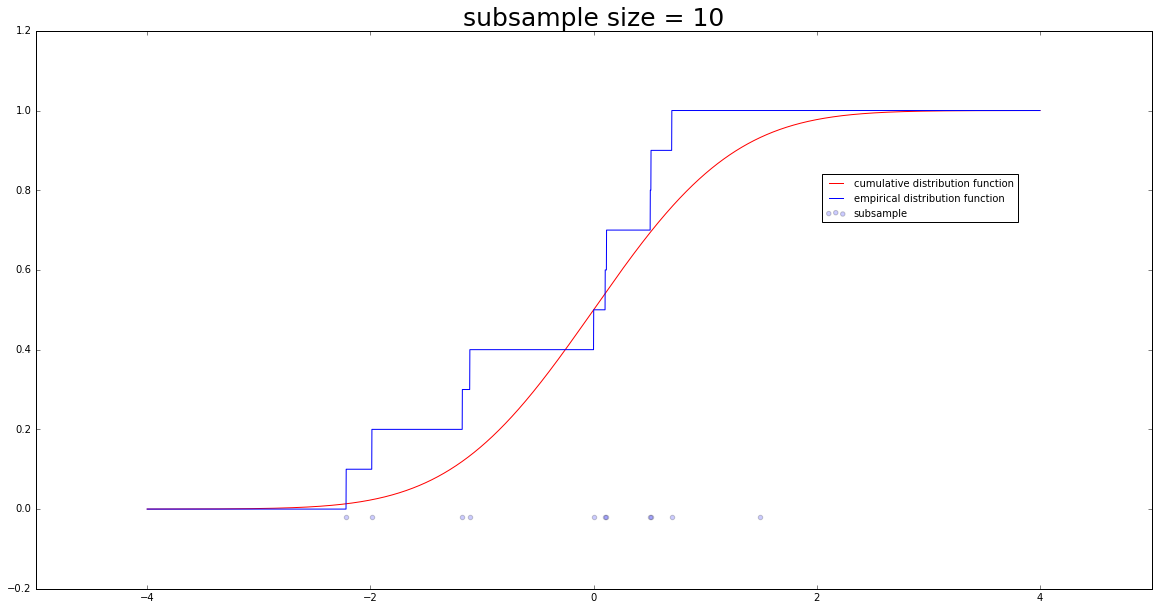

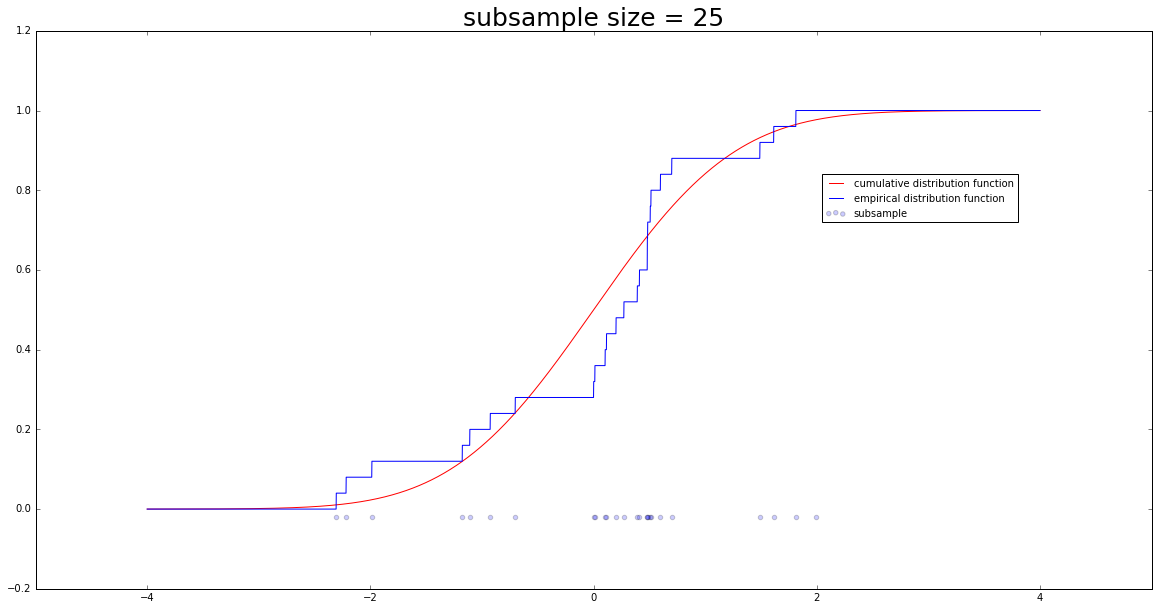

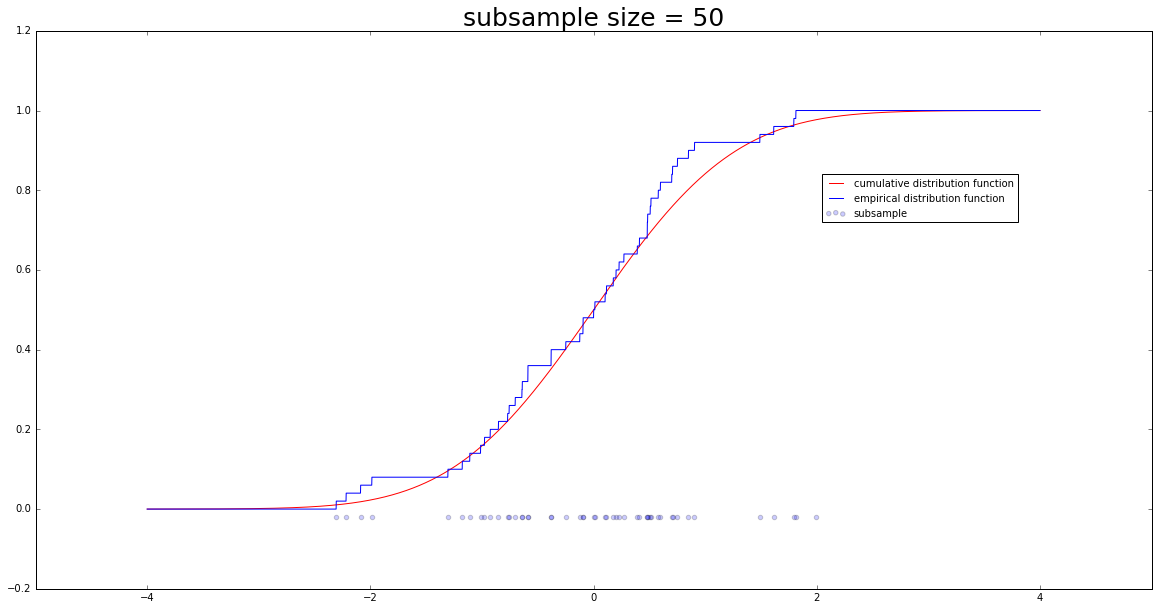

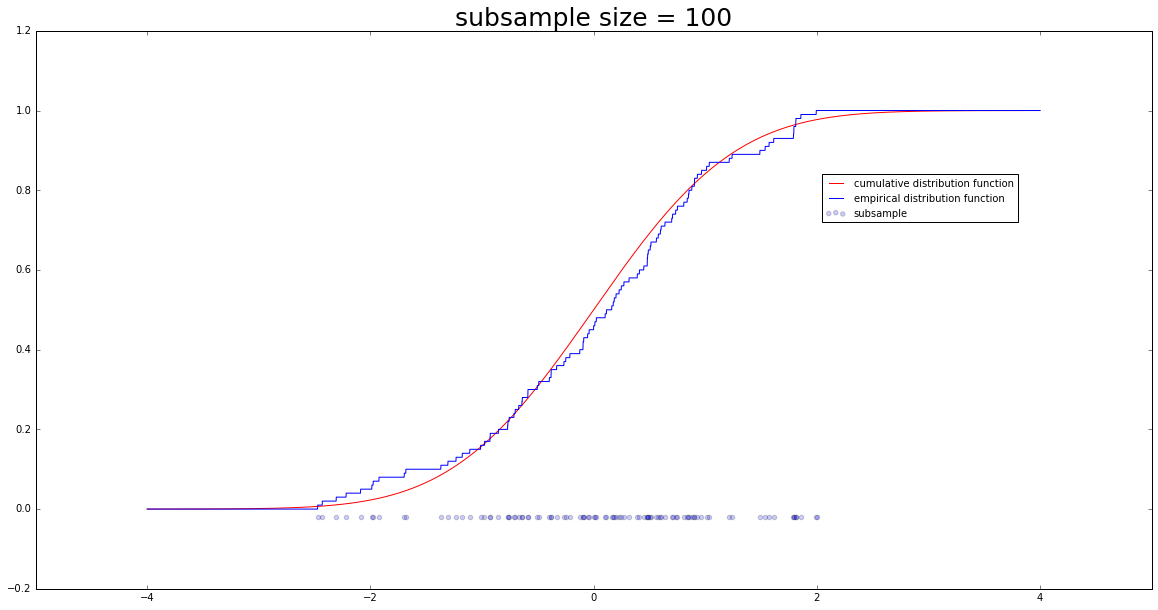

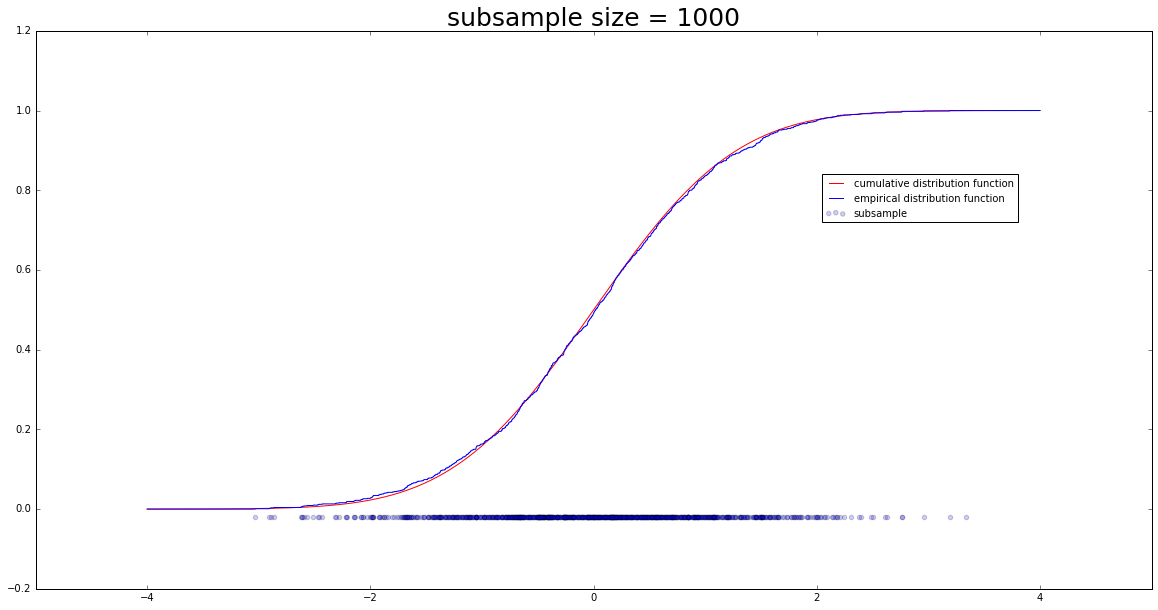

In [4]:
array = [10, 25, 50, 100, 1000, 10000]
x_value = np.linspace(-4, 4, sample_size)

for i in range(5):
    
    plt.figure(figsize=(20, 10))
    plt.title("subsample size = " + str(array[i]), fontsize = 25)
    
    #рисуем точки скачков на графике
    plt.scatter(sample[:array[i] + 1], np.zeros(array[i] + 1) - 0.02, alpha = 0.2, label = 'subsample')
    
    #график функции распределения
    plt.plot(x_value, sps.norm.cdf(x_value), color='red', label='cumulative distribution function')
    
    #график эмпирической функции распределения
    plt.plot(x_value, emp_distr_func(array[i]), color='blue', label='empirical distribution function')
    plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 10)
    plt.show()

### Действительно, мы видим что график эмпирической  функции распределения равномерно приближается к графику функции распределения

### Считаем значение $D_{n} = sup_{x \in R}|F^*_{n}(x) - F(x)| $

In [14]:
distr_func = sps.norm.cdf(x_value)
result = []

#считаем с шагом, потому что ооочень медленно работает
for i in range(0, sample_size, 100):
    result.append(max(abs(emp_distr_func(i + 1) - distr_func)))
    if (i % 1000 == 0): print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


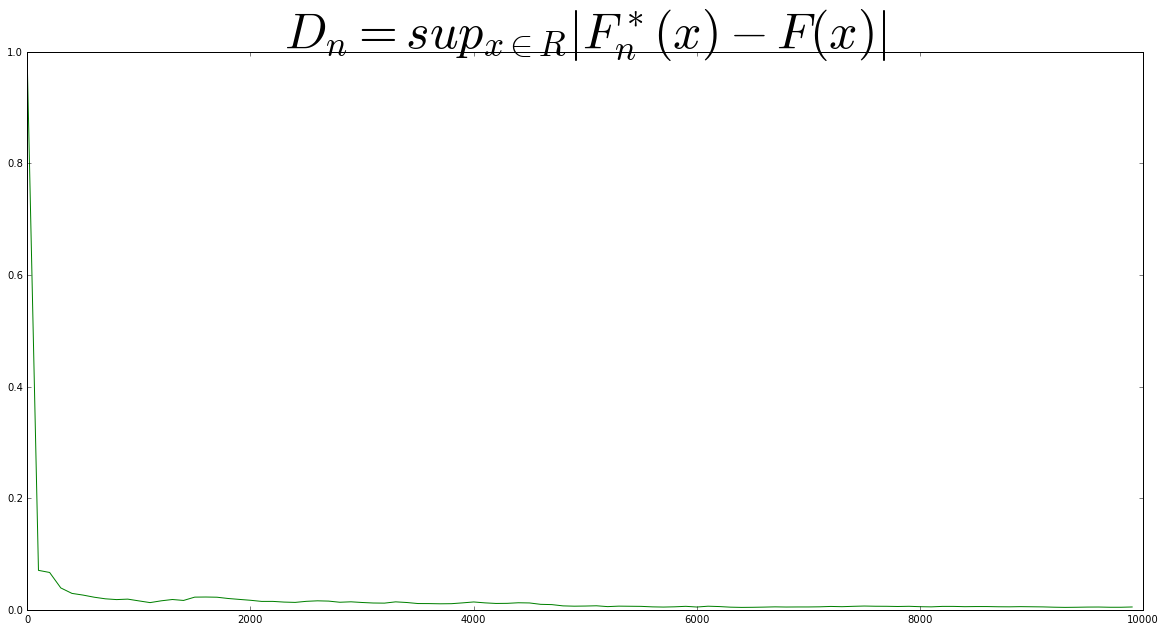

In [15]:
#нарисуем график зависимости 
plt.figure(figsize=(20, 10))
plt.title("$D_{n} = sup_{x \in R}|F^*_{n}(x) - F(x)| $", fontsize = 50)
plt.plot(np.arange(1, sample_size, 100), result, color='green')
plt.show()